<a href="https://colab.research.google.com/github/JINJA-E/rep4DL/blob/main/2%EC%9E%A5_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# The mathematical building blocks of neural networks

## A first look at a neural network

**Loading the MNIST dataset in Keras**

In [ ]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

#mnist 데이터만 불러오고 싶다면 이렇게!
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
#각 이미지와 라벨의 shape 확인

print('train_images : ',train_images.shape)
print('train_labels : ',train_labels.shape)

print('test_images : ',test_images.shape)
print('test_labels : ',test_labels.shape)

train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images :  (10000, 28, 28)
test_labels :  (10000,)


**The network architecture**

In [ ]:
#Previously Difine model
from tensorflow import keras
from tensorflow.keras import layers

#Define model Sequentially
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
]) 

**The compilation step**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Preparing the image data**

In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
#재확인
print('train_images : ',train_images.shape)
print('train_labels : ',train_labels.shape)

print('test_images : ',test_images.shape)
print('test_labels : ',test_labels.shape)

train_images :  (60000, 784)
train_labels :  (60000,)
test_images :  (10000, 784)
test_labels :  (10000,)


**"Fitting" the model**

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.2593 - accuracy: 0.9248
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1025 - accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0681 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0487 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0374 - accuracy: 0.9887


**Using the model to make predictions**

In [ ]:
test_images.shape

(10000, 784)

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions.shape

(10, 10)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99999857

In [ ]:
test_labels[0]

7

**Evaluating the model on new data**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9805
test_acc: 0.9804999828338623


## Data representations for neural networks

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

### Matrices (rank-2 tensors)

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

### Rank-3 and higher-rank tensors

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim
#x.shape
#x[1]

3

### Key attributes

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print('train_images : ',train_images.shape)
print('train_labels : ',train_labels.shape)

print('test_images : ',test_images.shape)
print('test_labels : ',test_labels.shape)

train_images :  (60000, 28, 28)
train_labels :  (60000,)
test_images :  (10000, 28, 28)
test_labels :  (10000,)


**Displaying the fourth digit**

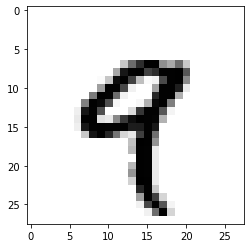

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]
digit
plt.imshow(digit, cmap=plt.cm.binary)
plt.show() 

### Manipulating tensors in NumPy

In [ ]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

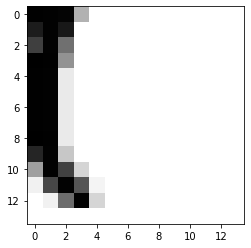

In [ ]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[4], cmap=plt.cm.binary)

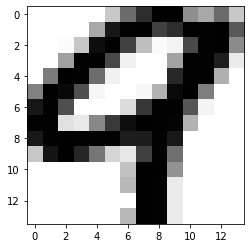

In [ ]:
my_slice = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice[4], cmap=plt.cm.binary)

### The notion of data batches

batch_size = 128로 지정하면, 데이터를 128개씩 쪼개서

만약 6만개 데이터면 60000/128 = 459번의 가중치를 업데이트를 하는거지

In [ ]:
#1th batch
batch = train_images[:128]

In [ ]:
#2th batch
batch = train_images[128:256]

In [ ]:
#3th batch
n = 3
batch = train_images[128*n : 128*(n+1)]

### Real-world examples of data tensors

### Vector data

### Timeseries data or sequence data

### Image data

### Video data

## The gears of neural networks: tensor operations

### Element-wise operations

In [ ]:
def naive_relu(x):
    assert len(x.shape) == 2  #x.ndim ==2가 아니면 오류를 일으켜 실행x
    
    x = x.copy()           #x가 변하기 때문에, 변하는게 싫으면 x.copy() 입력
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0) #relu함수
    return x

In [ ]:
import numpy as np

In [ ]:
x1 = np.array([[1,2,3],[2,3,-1]])
x1.ndim

2

In [ ]:
x1.shape

(2, 3)

In [ ]:
len(x1.shape)

2

In [ ]:
#각각의 값과 0 중 max, 그러니까 0이상으로 모두 만들어줌.
naive_relu(x1)

array([[1, 2, 3],
       [2, 3, 0]])

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]   #걍 더하는거
    return x

In [ ]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

#numpy는 위와같은 작업을 빠르고 쉽게 해줌!
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.29 s


### Broadcasting

In [ ]:
#example
#x = np.array([1,2,3,4,5])
#y = np.array([[1,1,1,1,1],[1,1,1,1,1]))

In [ ]:
import numpy as np
X = np.random.random((32, 10))
y = np.random.random((10,))

In [ ]:
X.shape

(32, 10)

In [ ]:
y

array([[0.2809081 , 0.00371188, 0.37822729, 0.829022  , 0.81229724,
        0.39704369, 0.10371925, 0.75640375, 0.77267676, 0.55080304]])

In [ ]:
y.ndim

2

In [ ]:
y = np.expand_dims(y, axis=0)

In [ ]:
y.shape

(1, 10)

In [ ]:
y

array([[0.0138655 , 0.22529548, 0.77601754, 0.16179947, 0.32996513,
        0.95329723, 0.51576902, 0.02952537, 0.32828253, 0.64817092]])

In [ ]:
Y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
 import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

### Tensor product

In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [ ]:
def naive_matrix_vector_dot(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)
    return z

In [ ]:
def naive_matrix_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

### Tensor reshaping

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
x = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
x.shape

(3, 2)

In [ ]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric interpretation of tensor operations

### A geometric interpretation of deep learning

## The engine of neural networks: gradient-based optimization

### What's a derivative?

### Derivative of a tensor operation: the gradient

### Stochastic gradient descent

### Chaining derivatives: The Backpropagation algorithm

#### The chain rule

#### Automatic differentiation with computation graphs

#### The gradient tape in TensorFlow

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [ ]:
x = tf.Variable(tf.random.uniform((2, 2))) #2x2행렬사이즈, 0~1사이
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [ ]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [ ]:
W = tf.Variable(tf.random.uniform((2, 2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform((2, 2))
with tf.GradientTape() as tape:
    y = tf.matmul(x, W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y, [W, b])

In [ ]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1.4005545, 1.4005545],
        [1.664473 , 1.664473 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

## Looking back at our first example

In [ ]:
#input data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)) #훈련 데이터 60000, 784 크기
train_images = train_images.astype("float32") / 255 #입력 데이터 타입 : float32
test_images = test_images.reshape((10000, 28 * 28)) #테스트 데이터 크기 10000,784 크기
test_images = test_images.astype("float32") / 255

In [ ]:
#network
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# 이 네트워크는 2개의 dense층이 연결되어 있고, 각 층은 가중치 텐서를 포함하여 입력데이터에 대한 몇 개의 간단한 텐서 연산을 작동.
#층의 속성인 가중치 텐서는 네트워크가 정보를 저장하는 곳이다.

In [ ]:
#network-compilation step
model.compile(optimizer="rmsprop", #경사하강법을 적용하는 구체적인 방식. / #sgd를 사용해보자
              loss="sparse_categorical_crossentropy", #손실함수, #가중치 텐서를 학습하기 위한 피드백 신호로, 훈련하는 동안 최소화된다.
              metrics=["accuracy"])

In [ ]:
#training loop
model.fit(train_images, train_labels, epochs=5, batch_size=128) #훈련 반복 

#fit 메서드를 호출하면, 네트워크가 128개 샘플씩 미니 배치로 훈련데이터를 다섯번 반복한다. (각 반복을 epoch라고 부름)
#각 반복마다 네트워크가 배치에서 손실에 대한 가중치의 그래디언트를 계산하고 가중치를 업데이트 한다.
#다섯번의 에포크 동안 네트워크는 2345번의 그래디언트 업데이트를 수행할 것이다 (epoch 마다 469번) -> #훈련샘플이 6만개, 128개씩 나누면 469개의 가중치 업데이트가 됨.


Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2559 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1038 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0685 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0496 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0376 - accuracy: 0.9888


### Reimplementing our first example from scratch in TensorFlow

#### A simple Dense class

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

__init__ 에서

> 들여쓴 블록


input_size = p : x가 1 by p vector

output_size = q : W가 q by p vector

w_shape  = input_size, output_size : xW (1 by p * p by q )

b_shape = q by 1 

#### A simple Sequential class

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

  __init__에서 , layers = [l1, l2]

 __call__에서, return x에서 x = l2(l1(x))
 

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

#### A batch generator

In [ ]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

### Running one training step

In [ ]:
#tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights) #손실함수에서 weights를 이용해 기울기(gradient를구함)
    update_weights(gradients, model.weights) #gradient 결과값을 통해 가중치를 업데이트한다.
    return average_loss 

위 과정은, run the 'forward pass(compute the model's predictions under a gradient Tape scope) 이다.

gradients = tape.gradient(average_loss, model_weights) 는
compute the gradient of the loss with regard to the weights. the output gradients is a list where each entry correspnds to a weight from the model.
weights list.



In [ ]:
#naive mini-batch gradient update이다.

learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [ ]:
#Using optimizer

from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### The full training loop

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels) #각 배치를 만들고,
        for batch_counter in range(batch_generator.num_batches): 
            images_batch, labels_batch = batch_generator.next()# 다음 배치로 넘어가서
            loss = one_training_step(model, images_batch, labels_batch) #
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 4.49
loss at batch 100: 2.26
loss at batch 200: 2.23
loss at batch 300: 2.09
loss at batch 400: 2.21
Epoch 1
loss at batch 0: 1.92
loss at batch 100: 1.90
loss at batch 200: 1.85
loss at batch 300: 1.71
loss at batch 400: 1.81
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.59
loss at batch 200: 1.52
loss at batch 300: 1.43
loss at batch 400: 1.50
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.35
loss at batch 200: 1.25
loss at batch 300: 1.21
loss at batch 400: 1.26
Epoch 4
loss at batch 0: 1.14
loss at batch 100: 1.16
loss at batch 200: 1.05
loss at batch 300: 1.05
loss at batch 400: 1.10
Epoch 5
loss at batch 0: 0.99
loss at batch 100: 1.02
loss at batch 200: 0.91
loss at batch 300: 0.93
loss at batch 400: 0.98
Epoch 6
loss at batch 0: 0.88
loss at batch 100: 0.91
loss at batch 200: 0.80
loss at batch 300: 0.83
loss at batch 400: 0.89
Epoch 7
loss at batch 0: 0.80
loss at batch 100: 0.82
loss at batch 200: 0.72
loss at batch 300: 0.76
loss at batch 40

### Evaluating the model

In [ ]:
import numpy as np

predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

ValueError: ignored

In [ ]:
#원래대로 실행하면 0.82나옴

## Summary